In [10]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Dabase credentials

import pymysql
from sqlalchemy import create_engine
driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'cookies'

In [17]:
pd.set_option('display.max_columns',100)

In [3]:
# Create dataframe

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

query = 'SHOW TABLES'

user_df = pd.read_sql(query,engine)
user_df


query2 = """
SELECT * FROM cookies_quality
"""

cookies_df = pd.read_sql(query2, engine)

In [4]:
cookies_df.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.3,3
1,2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,5,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.3,3


In [5]:
# Only incorrect data type is for crunch float
cookies_df.dtypes

id                        int64
sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
diameter                  int64
mixins                   object
crunch factor            object
aesthetic appeal          int64
dtype: object

In [7]:
# Change data type for 'crunch factor'

cookies_df['crunch factor'] = cookies_df['crunch factor'].astype('float')

In [9]:
# Check NaNs

cookies_df.isna().sum()

id                       0
sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   0
crunch factor            0
aesthetic appeal         0
dtype: int64

In [11]:
cookies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 17 columns):
id                      5198 non-null int64
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5198 non-null object
crunch factor           5198 non-null float64
aesthetic appeal        5198 non-null int64
dtypes: float64(10), int64(5), object(2)
memory usage: 690.4+ KB


In [13]:
# We drop the NaNs since they are very few values compared to the size of the data

cookies_df.dropna(inplace=True)

In [14]:
cookies_df.describe()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.0,5183.00000,5183.000000
mean,2602.034343,0.318092,5.400309,559.594829,30.373336,114.982925,0.995436,8.222012,0.530984,10.495717,7.324715,14.384661,7.0,1.49919,3.000579
std,1499.930402,0.149870,4.668715,353.232673,17.254227,56.494207,0.055712,0.283630,0.150975,1.194754,1.302886,3.026680,0.0,0.28931,0.024054
min,1.000000,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.00000,3.000000
25%,1303.500000,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.25000,3.000000
50%,2603.000000,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,7.0,1.50000,3.000000
75%,3900.500000,0.390000,8.000000,640.000000,41.000000,155.000000,0.996905,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.75000,3.000000
max,5198.000000,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.00000,4.000000


In [15]:
flavour_list = ['raisins', 'nuts', 'chocolate', 'oats', 'peanut butter']
for flavour in flavour_list:
   cookies_df[flavour] = 0

for flavour in flavour_list:
   cookies_df[flavour] = np.where(cookies_df['mixins'].str.contains(flavour), 1, 0)

In [18]:
cookies_df.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter
0,1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3,1,0,0,0,0
1,2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3,1,0,0,0,0
2,3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3,0,1,1,0,0
3,4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3,0,0,1,0,0
4,5,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3,0,1,1,1,0


In [19]:
cookies_df['butter_type_int'] = pd.get_dummies(cookies_df['butter type'],drop_first=True)

In [21]:
cookies_df.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter,butter_type_int
0,1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3,1,0,0,0,0,1
1,2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3,1,0,0,0,0,1
2,3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3,0,1,1,0,0,1
3,4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3,0,0,1,0,0,1
4,5,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3,0,1,1,1,0,0


In [22]:
cookies_df.columns

Index(['id', 'sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal', 'raisins', 'nuts', 'chocolate',
       'oats', 'peanut butter', 'butter_type_int'],
      dtype='object')

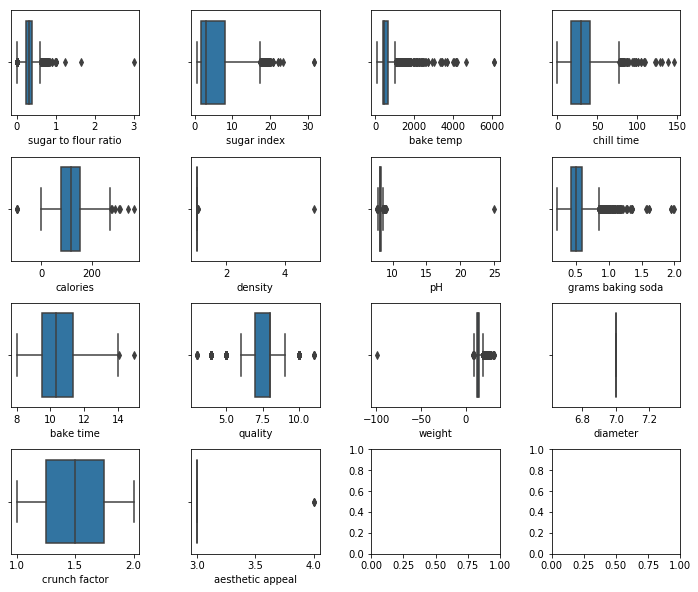

In [23]:
f, ax = plt.subplots(4,4, figsize=(12,10))

cols = ['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'weight', 'diameter',
       'crunch factor', 'aesthetic appeal']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14: 
            break
        else:    
            sns.boxplot(cookies_df[cols[i]], ax=col)
            i += 1

In [ ]:
# for col in cols:
#     q1 = scrap_num[col].quantile(0.25)
#     q3 = scrap_num[col].quantile(0.75)
#     iqr = q3 - q1
#     # saltar el paràmetre S14 (sinó tots els valors es converteixen en NaNs)
#     if iqr > 0.05:
#         scrap_without_outliers[col] = scrap_num[col].apply(lambda x: x if x > q1 - 3 * iqr and x < q3 + 3 * iqr else np.nan)
#     else:
#         scrap_without_outliers[col] = scrap_num[col]